In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display

print('Reading .csv  with pandas...')
this_thermochemistry = pd.read_csv('copy_thermoPAH.csv')

print('Displaying .csv ...')
display(this_thermochemistry)

Reading .csv  with pandas...
Displaying .csv ...


,#carbons/molecule,#hydrogens/molecule,# valence electrons / molecule,#bonds / molecule,#total particles/molecule,bonds/particle,molecular (nuclear) weight,entropy S (298K) (J/mol/K),entropy S (298K) (J/g/K),formation entropy Sf (298K) (J/mol/K),...,standard molar enthalpy of formation / mol of particles (298K) (kJ/mol),Standard molar free entropy of formation / mol of particles (298K) (J/mol/K),standard molar entropy / molar of hydrogen atoms (J/mol/K) (298K),standard molar entropy of formation / mol of hydrogen atoms (J/mol/K) (298K),standard molar enthalpy of formation / mol of hydrogen atoms,standard molar free entropy of formation / mol of hydrogen atoms,standard molar entropy / mol / nuclear weight (J / g / K),standard molar entropy of formation / mol / nuclear weight (J / g / K),standard molar enthalpy of formation / mol / nuclear weight (kJ / g / K),standard molar free entropy of formation / mol / nuclear weight (J / g / K)
0,6,6,30,15,120,0.125000,78.12,269.9,3.454941,-156.592,...,0.120000,1.707618,44.983333,-26.098667,2.400000,34.152358,3.454941,-2.004506,0.184332,2.623069
1,6,5,29,14,118,0.118644,77.11,289.8,3.758267,-136.692,...,0.122034,1.567917,57.960000,-27.338400,2.880000,37.002830,57.960000,-27.338400,2.880000,37.002830
2,8,6,38,19,156,0.121795,102.14,329.8,3.228902,-96.692,...,0.127564,1.047888,54.966667,-16.115333,3.316667,27.245087,54.966667,-16.115333,3.316667,27.245087
3,8,5,37,18,154,0.116883,101.13,341.4,3.375853,-85.092,...,0.129221,0.986172,68.280000,-17.018400,3.980000,30.374105,68.280000,-17.018400,3.980000,30.374105
4,8,5,37,18,154,0.116883,101.13,340.7,3.368931,-85.792,...,0.128571,0.988539,68.140000,-17.158400,3.960000,30.446991,68.140000,-17.158400,3.960000,30.446991
5,8,5,37,18,154,0.116883,101.13,334.7,3.309602,-91.792,...,0.128571,1.027500,66.940000,-18.358400,3.960000,31.646991,66.940000,-18.358400,3.960000,31.646991
6,8,8,40,20,160,0.125000,104.16,345.7,3.318932,-80.792,...,0.127500,0.932802,43.212500,-10.099000,2.550000,18.656047,43.212500,-10.099000,2.550000,18.656047
7,8,7,39,19,158,0.120253,103.15,350.0,3.393117,-76.492,...,0.136076,0.940757,50.000000,-10.927429,3.071429,21.234236,50.000000,-10.927429,3.071429,21.234236
8,8,7,39,19,158,0.120253,103.15,350.1,3.394086,-76.392,...,0.132911,0.929505,50.014286,-10.913143,3.000000,20.980257,50.014286,-10.913143,3.000000,20.980257
9,8,7,39,19,158,0.120253,103.15,357.1,3.461949,-69.392,...,0.132278,0.883077,51.014286,-9.913143,2.985714,19.932318,51.014286,-9.913143,2.985714,19.932318


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#model 1: basic multilinear regression for the formation free entropy 

#first response: gibbs free entropy
y = this_thermochemistry['formation free entropy (298K) (J/mol/K)']
#first predictors: molecular variables (and some thermodynamics)
X = this_thermochemistry[['#carbons/molecule', '#hydrogens/molecule', '# valence electrons / molecule', '#bonds / molecule', '#total particles/molecule', 'bonds/particle', 'molecular (nuclear) weight']]#, 'entropy S (298K) (J/mol/K)', 'formation enthalpy (298K) (kJ/mol)' ]]

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1_molar_free_entropy = LinearRegression()
model_1_molar_free_entropy.fit(X_train, y_train)

y_pred = model_1_molar_free_entropy.predict(X_test)

print('Model score: ', model_1_molar_free_entropy.score(X_test, y_test)) 

Model score:  0.8353411232224297


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


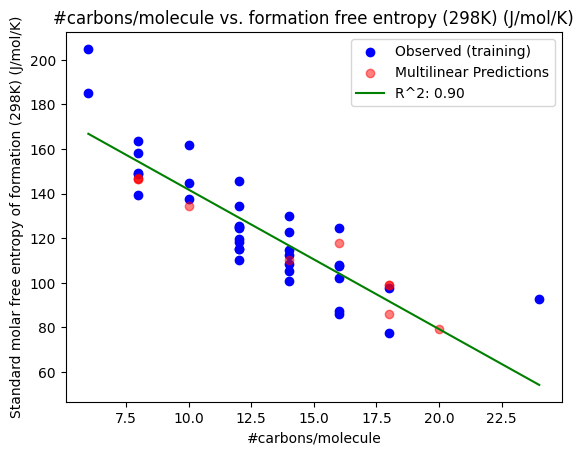

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


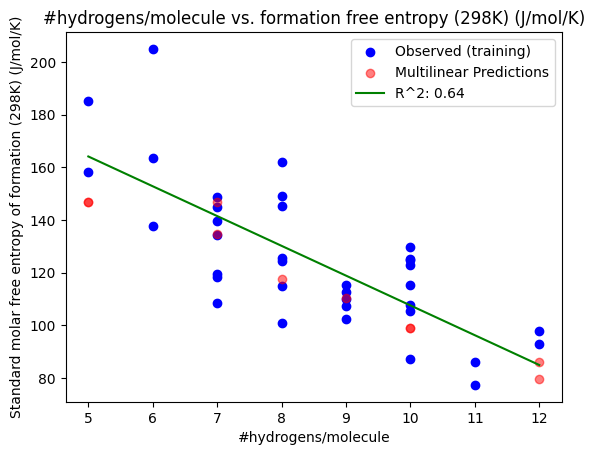

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


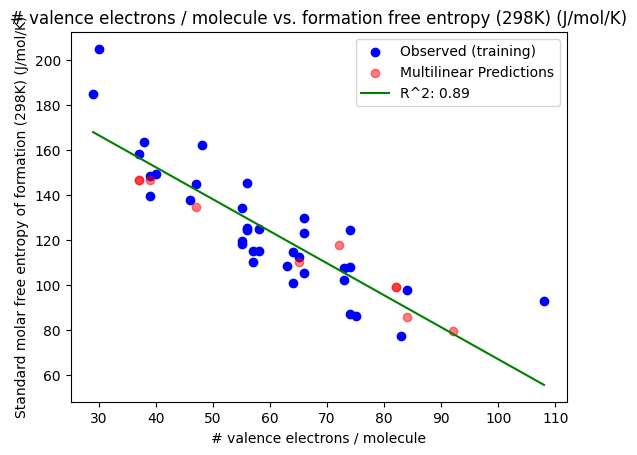

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


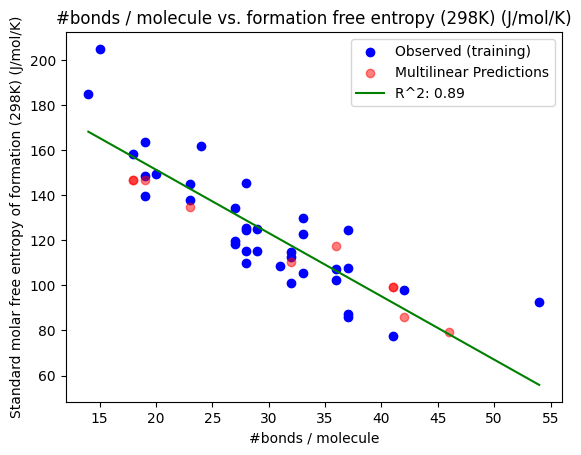

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


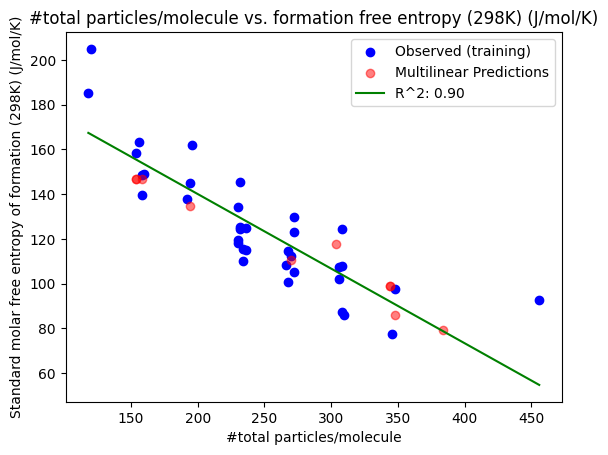

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


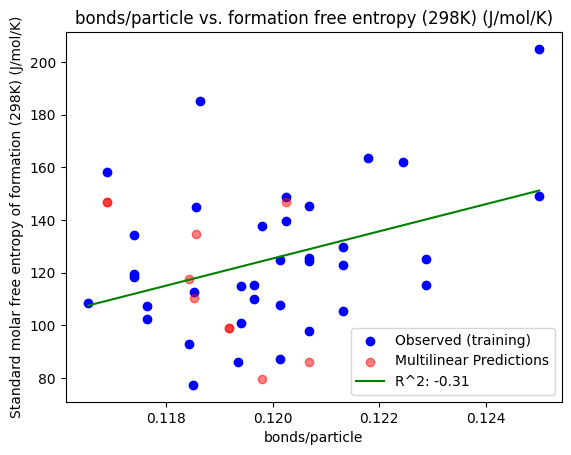

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


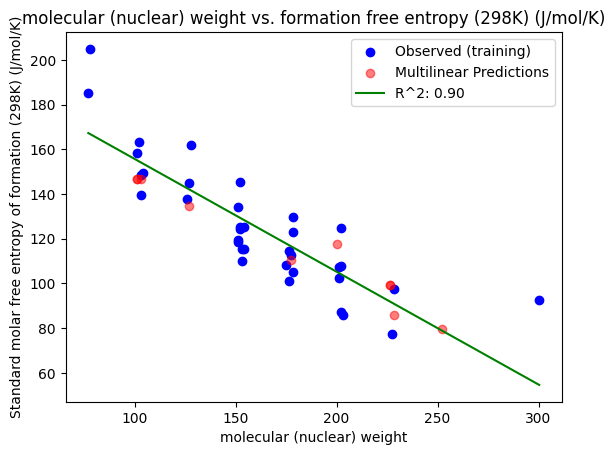

In [3]:
model_transient = LinearRegression()
#this is a "placeholder" model that we will refit in the following loop

#this loops through the columns and makes individual linear models for each column
#that way we can make the curve linear with respect to each variable as opposed to one multilinear model

#this particular run is taking us through generating linear models between standard molar free entropy of formation and a host of properties:
for column_name in X.columns:
    x_vals = np.linspace(X[column_name].min(), X[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel(column_name)
    plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
    plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize(model):
    # Coefficients and Intercept
    coefficients = model.coef_
    intercept = model.intercept_

    print("Intercept:", intercept)
    print("Coefficients:")
    for feature, coef in zip(X_train.columns, coefficients):
        print(f"  {feature}: {coef}")

    # To evaluate the model, you can use metrics like R^2, MSE, etc.

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

summarize(model_1_molar_free_entropy)

Intercept: -638.7911988366022
Coefficients:
  #carbons/molecule: 0.7683724482234083
  #hydrogens/molecule: -6.837982357470985
  # valence electrons / molecule: -3.764492576890494
  #bonds / molecule: -8.181571854772532
  #total particles/molecule: 0.1547393151594143
  bonds/particle: 7198.796602301366
  molecular (nuclear) weight: 2.321790921945499
Mean Squared Error: 135.4174692844097
R^2 Score: 0.8353411232224297


In [5]:
#repeating the previous regression with lasso regularization.
from sklearn.linear_model import LassoCV
model_2_lasso_molar_free_entropy = LassoCV(cv=10)
model_2_lasso_molar_free_entropy.fit(X_train, y_train)

y_pred = model_2_lasso_molar_free_entropy.predict(X_test)

summarize(model_2_lasso_molar_free_entropy)

Intercept: 197.97101492481193
Coefficients:
  #carbons/molecule: -0.0
  #hydrogens/molecule: -0.0
  # valence electrons / molecule: -0.0
  #bonds / molecule: -0.0
  #total particles/molecule: -0.2974585835620723
  bonds/particle: 0.0
  molecular (nuclear) weight: -0.0
Mean Squared Error: 89.92096690775008
R^2 Score: 0.8906619250232303


*Note:* It is interesting that the lasso selected exclusively for total particles / molecule

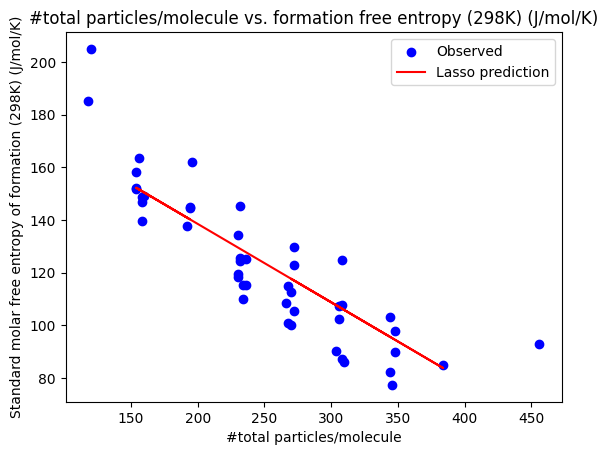

In [6]:
#plotting the lasso regression model for the standard molar free entropy of formation
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
#r2_score = model_2_lasso_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

Intercept: 220.34813807451587
Coefficients:
  #carbons/molecule: 0.4746590740764867
  #hydrogens/molecule: -5.137263608526174
  # valence electrons / molecule: -3.2386273122260048
  #bonds / molecule: 16.19751885364877
  #total particles/molecule: -1.730663883702601
  bonds/particle: 0.17359422040207853
  molecular (nuclear) weight: 0.5120192351254899
Mean Squared Error: 99.88277644492965
R^2 Score: 0.8785490094759826


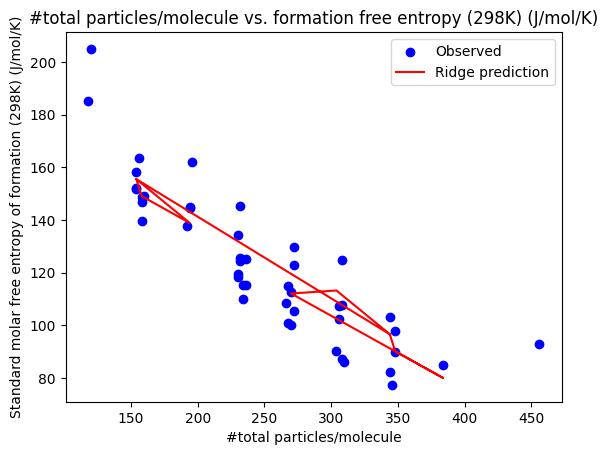

In [7]:
#repeating the previous regression with ridge regularization.
from sklearn.linear_model import RidgeCV
model_3_ridge_molar_free_entropy = RidgeCV(cv=10)
model_3_ridge_molar_free_entropy.fit(X_train, y_train)

y_pred = model_3_ridge_molar_free_entropy.predict(X_test)
summarize(model_3_ridge_molar_free_entropy)

#plotting the ridge regression model for the standard molar free entropy of formation
#this graph might not be super useful
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
#r2_score = model_3_ridge_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

The lasso regression yields a lower error when analyzing correlations between molecular properties and the standard molar free entropy of formation, and it shows that the optimal regularization is to predict only over the #total particles/molecule.

Next, we will do a similar analysis for exponential fitting.

Fitting exponential multiple linear regression...
Model score:  0.8134255777843302


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


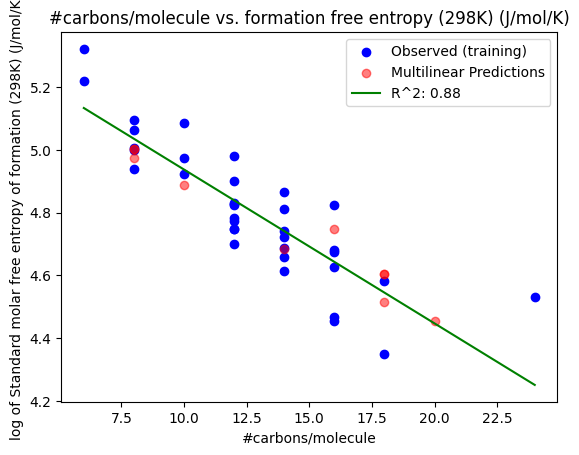

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


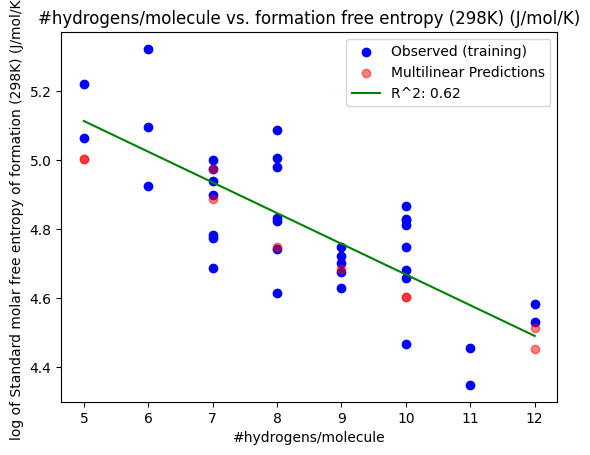

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


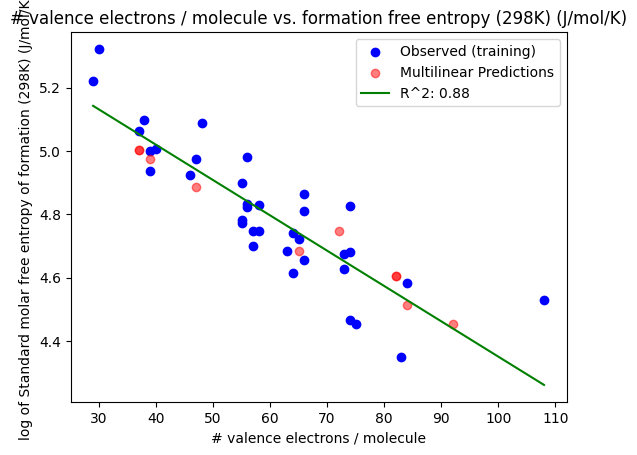

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


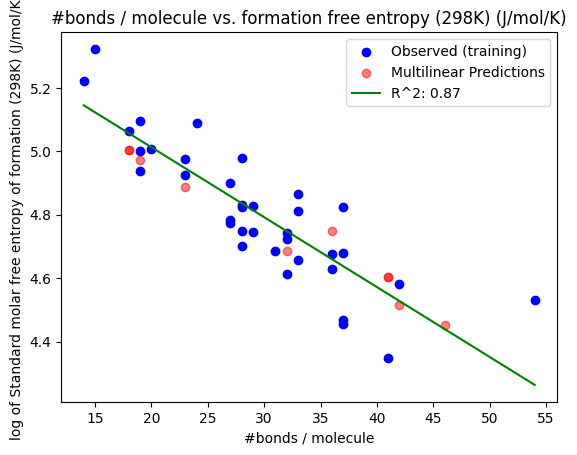

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


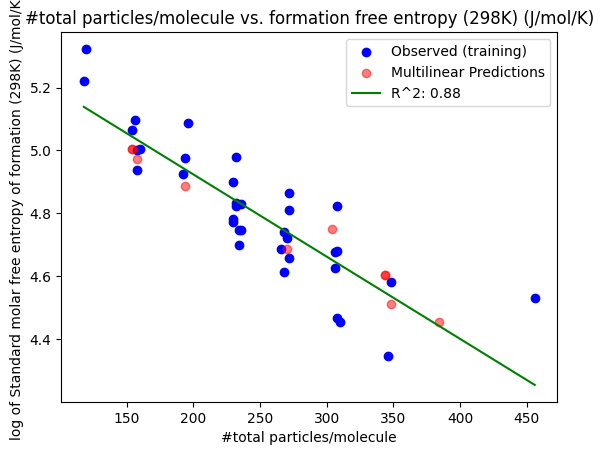

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


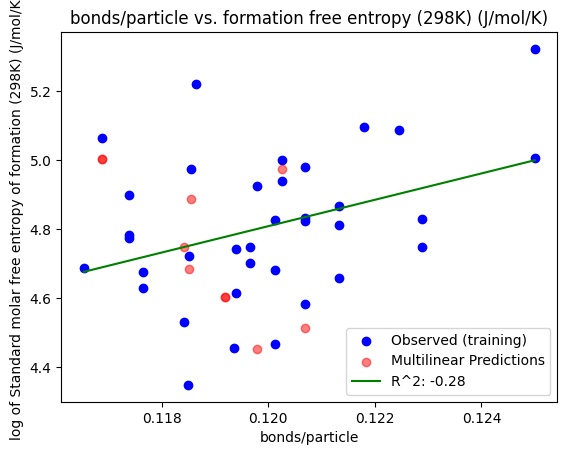

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


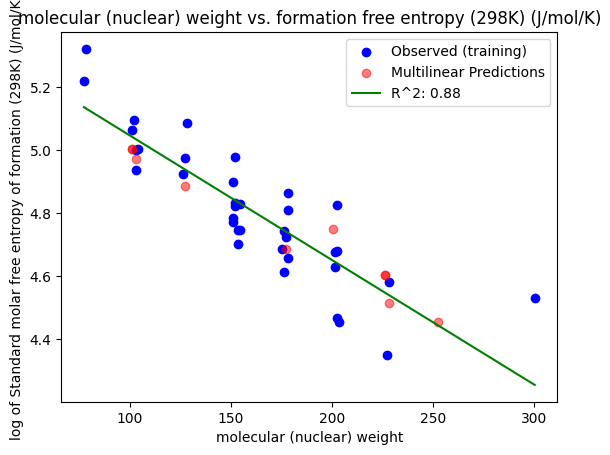

Intercept: 1.769925523715166
Coefficients:
  #carbons/molecule: 0.006066519986980604
  #hydrogens/molecule: -0.058962127427225126
  # valence electrons / molecule: -0.03469604753393453
  #bonds / molecule: 0.05716088102326643
  #total particles/molecule: -0.008726895257045945
  bonds/particle: 31.940676265681365
  molecular (nuclear) weight: 0.013307156341375921
Mean Squared Error: 0.011414419772699799
R^2 Score: 0.8134255777843302
Fitting exponential lasso regression...
Intercept: 5.3828835274032505
Coefficients:
  #carbons/molecule: -0.0
  #hydrogens/molecule: -0.0
  # valence electrons / molecule: -0.0
  #bonds / molecule: -0.0
  #total particles/molecule: -0.002352018269547805
  bonds/particle: 0.0
  molecular (nuclear) weight: -0.0
Mean Squared Error: 0.008655087399233924
R^2 Score: 0.8585282508533285
Plotting exponential lasso regression...


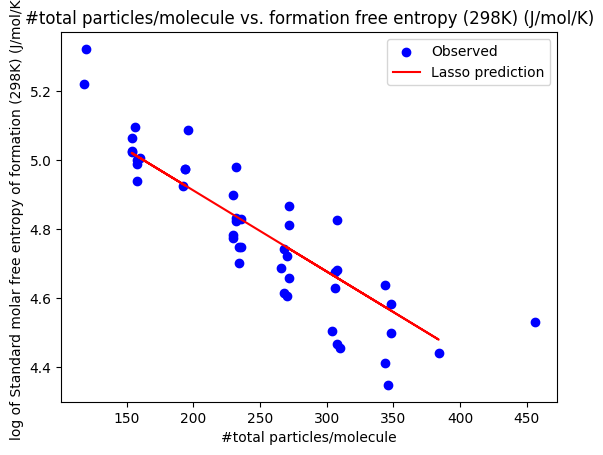

Computing exponential ridge regression...
Intercept: 5.559861237807843
Coefficients:
  #carbons/molecule: 0.003911881198039043
  #hydrogens/molecule: -0.04220183832581526
  # valence electrons / molecule: -0.026554313533696024
  #bonds / molecule: 0.13122368026769943
  #total particles/molecule: -0.013989815087279195
  bonds/particle: 0.0010536159898635034
  molecular (nuclear) weight: 0.0043578364798766605
Mean Squared Error: 0.009385722317913946
R^2 Score: 0.846585656265266
Plotting exponential ridge regression...


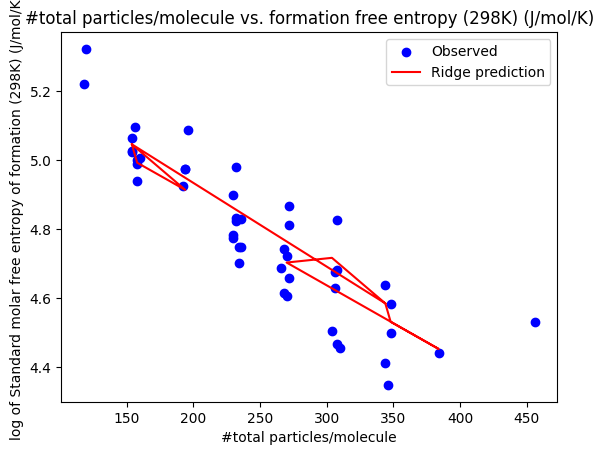

In [8]:
print('Fitting exponential multiple linear regression...')

y_transformed = np.log(y)

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

model_4_exponential_molar_free_entropy = LinearRegression()
model_4_exponential_molar_free_entropy.fit(X_train, y_train)

y_pred = model_4_exponential_molar_free_entropy.predict(X_test)

print('Model score: ', model_4_exponential_molar_free_entropy.score(X_test, y_test))

#this particular run is taking us through generating exponential models between standard molar free entropy of formation and a host of properties:
for column_name in X.columns:
    x_vals = np.linspace(X[column_name].min(), X[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel(column_name)
    plt.ylabel('log of Standard molar free entropy of formation (298K) (J/mol/K)')
    plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

summarize(model_4_exponential_molar_free_entropy)

print('Fitting exponential lasso regression...')

model_5_lasso_exponential_molar_free_entropy = LassoCV(cv=10)
model_5_lasso_exponential_molar_free_entropy.fit(X_train, y_train)

y_pred = model_5_lasso_exponential_molar_free_entropy.predict(X_test)

summarize(model_5_lasso_exponential_molar_free_entropy)

print('Plotting exponential lasso regression...')

#plotting the lasso regression model for the standard molar free entropy of formation
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y_transformed, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
#r2_score = model_2_lasso_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('log of Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

print('Computing exponential ridge regression...')

model_6_ridge_exponential_molar_free_entropy = RidgeCV(cv=10)
model_6_ridge_exponential_molar_free_entropy.fit(X_train, y_train)

y_pred = model_6_ridge_exponential_molar_free_entropy.predict(X_test)
summarize(model_6_ridge_exponential_molar_free_entropy)

print('Plotting exponential ridge regression...')
#plotting the ridge regression model for the standard molar free entropy of formation
#this graph might not be super useful
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y_transformed, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
#r2_score = model_3_ridge_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('log of Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

Fitting logarithmic multiple linear regression...
Model score:  0.8184566530765839
Intercept: 17374639.425016154
Coefficients:
  #carbons/molecule: -15320574.403235571
  #hydrogens/molecule: -14151.53621035628
  # valence electrons / molecule: 10373268.864093073
  #bonds / molecule: 14975480700.32449
  #total particles/molecule: -15084512704.761421
  bonds/particle: -14975480155.57538
  molecular (nuclear) weight: 113993358.73291314
Mean Squared Error: 149.30346354178144
R^2 Score: 0.8184566530765839


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


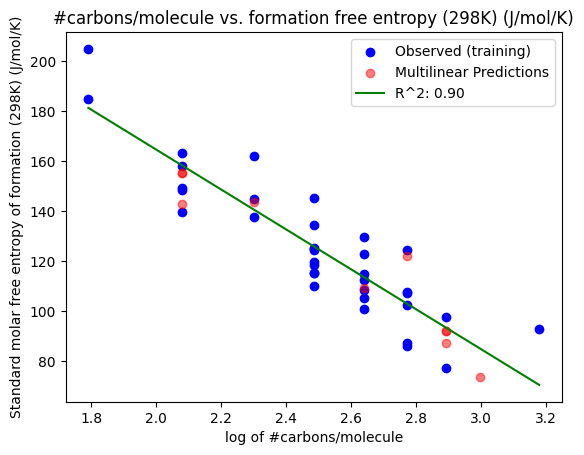

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


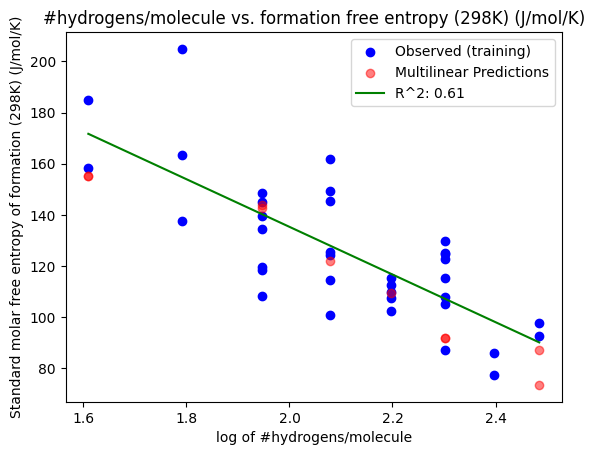

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


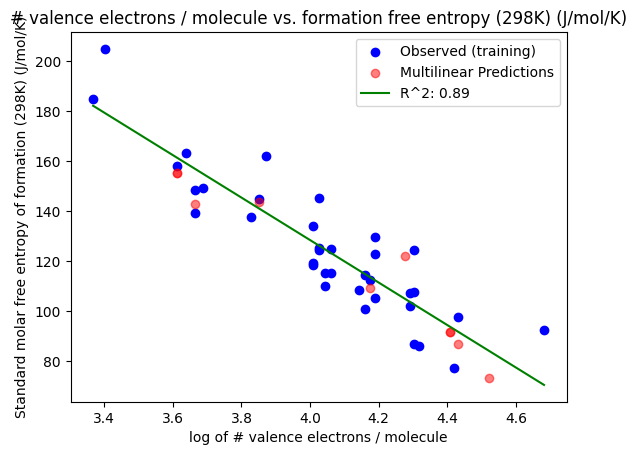

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


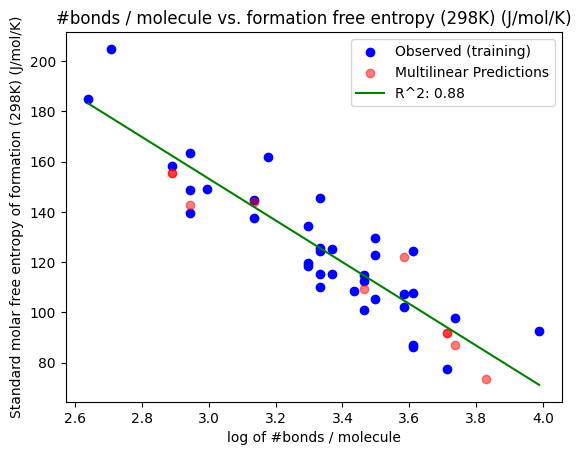

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


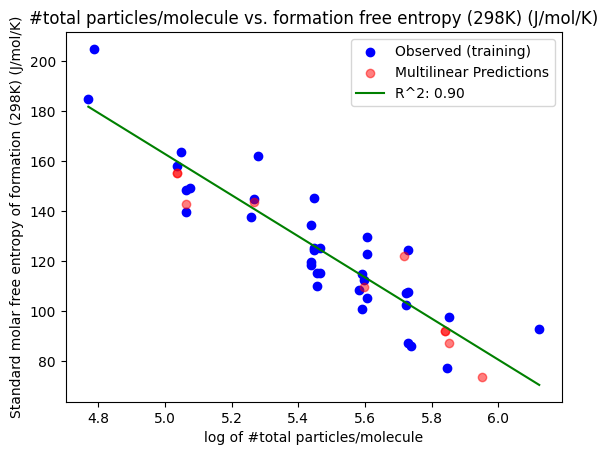

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


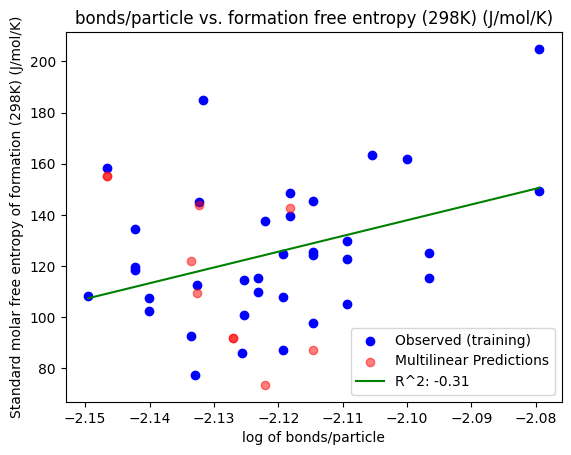

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


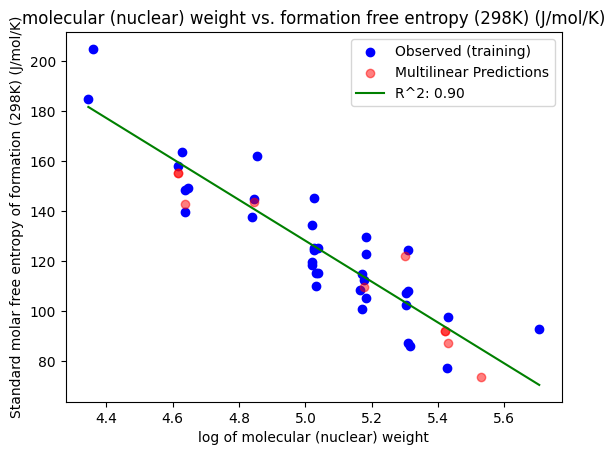

Fitting logarithmic lasso regression...
Intercept: 1304.8102598601138
Coefficients:
  #carbons/molecule: -38.874602753738834
  #hydrogens/molecule: -53.64657060574993
  # valence electrons / molecule: -0.0
  #bonds / molecule: 0.0
  #total particles/molecule: -0.0
  bonds/particle: 457.1627859654187
  molecular (nuclear) weight: -0.0
Mean Squared Error: 85.95433079049121
R^2 Score: 0.8954850977726887
Plotting logarithmic lasso regression...


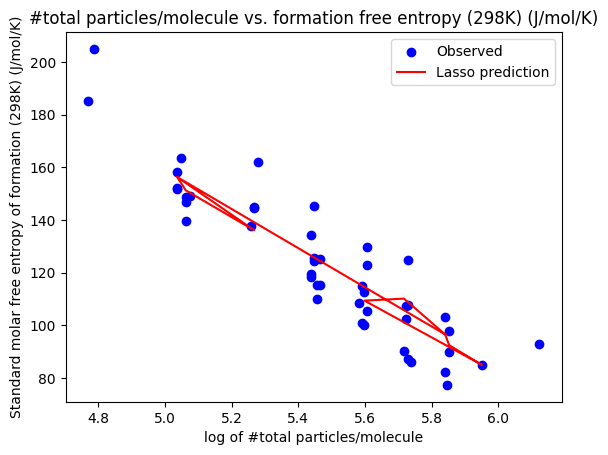

Computing logarithmic ridge regression...
Intercept: 444.0308294933981
Coefficients:
  #carbons/molecule: -15.952601971667873
  #hydrogens/molecule: -6.2529257450177065
  # valence electrons / molecule: -14.362426332728443
  #bonds / molecule: -12.784669706420372
  #total particles/molecule: -15.173930642764718
  bonds/particle: 2.38926092267372
  molecular (nuclear) weight: -15.351323656486242
Mean Squared Error: 92.13182218855567
R^2 Score: 0.8879736681153225
Plotting logarithmic ridge regression...


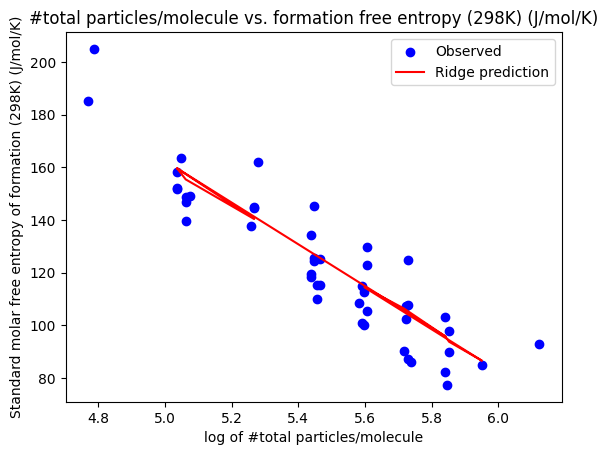

In [9]:
print('Fitting logarithmic multiple linear regression...')

X_transformed = np.log(X)

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model_7_logarithmic_molar_free_entropy = LinearRegression()
model_7_logarithmic_molar_free_entropy.fit(X_train, y_train)

y_pred = model_7_logarithmic_molar_free_entropy.predict(X_test)

print('Model score: ', model_7_logarithmic_molar_free_entropy.score(X_test, y_test))

summarize(model_7_logarithmic_molar_free_entropy)

#this particular run is taking us through generating exponential models between standard molar free entropy of formation and a host of properties:
for column_name in X.columns:
    x_vals = np.linspace(X_transformed[column_name].min(), X_transformed[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel('log of ' + column_name)
    plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
    plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

print('Fitting logarithmic lasso regression...')

model_8_lasso_logarithmic_molar_free_entropy = LassoCV(cv=10)
model_8_lasso_logarithmic_molar_free_entropy.fit(X_train, y_train)

y_pred = model_8_lasso_logarithmic_molar_free_entropy.predict(X_test)

summarize(model_8_lasso_logarithmic_molar_free_entropy)

print('Plotting logarithmic lasso regression...')

#plotting the lasso regression model for the standard molar free entropy of formation
column_name = '#total particles/molecule'
plt.scatter(X_transformed[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
plt.xlabel('log of ' + column_name)
plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

print('Computing logarithmic ridge regression...')

model_9_ridge_logarithmic_molar_free_entropy = RidgeCV(cv=10)
model_9_ridge_logarithmic_molar_free_entropy.fit(X_train, y_train)

y_pred = model_9_ridge_logarithmic_molar_free_entropy.predict(X_test)
summarize(model_9_ridge_logarithmic_molar_free_entropy)

print('Plotting logarithmic ridge regression...')
#plotting the ridge regression model for the standard molar free entropy of formation
#this graph might not be super useful
column_name = '#total particles/molecule'
plt.scatter(X_transformed[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
#r2_score = model_3_ridge_molar_free_entropy.score(X_test, y_test)
plt.xlabel('log of ' + column_name)
plt.ylabel('Standard molar free entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. formation free entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

It is interesting to note that, after searching for exponential and logarithmic correlations for the dependence of the standard molar free entropy of formation of PAHs on multiple predictors describing molecular structure, a linear lasso regression which shows a *decrease* of molar free entropy alongside an inversely proportional increase in the total particles per molecule has a strong correlation with $R^2 = 0.89$ and it selectively eliminates all other predictors. However, some of the single-predictor models with logarithmic correlation achieve similarly high $R^2$ ith the standard molar free entropy of formation as a response, such as the #carbons/molecule at $R^2 = 0.90$, valence electrons / molecules at $R^2 = 0.89$, #bonds / molecule at $R^2 = 0.88$, #total particles / molecule at $R^2 = 0.90$, and molecular weight at $R^2 = 0.90$. This may suggest that a logarithmic curve with a single predictor, such as molecular weight, will be most accurate in predicting the standard molar free entropy of formation for PAHs.

In [10]:
#second response: standard molar entropy
y = this_thermochemistry['entropy S (298K) (J/mol/K)']
#first predictors: molecular variables (and some thermodynamics)
X = this_thermochemistry[['#carbons/molecule', '#hydrogens/molecule', '# valence electrons / molecule', '#bonds / molecule', '#total particles/molecule', 'bonds/particle', 'molecular (nuclear) weight']]#, 'entropy S (298K) (J/mol/K)', 'formation enthalpy (298K) (kJ/mol)' ]]

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_10_molar_entropy = LinearRegression()
model_10_molar_entropy.fit(X_train, y_train)

y_pred = model_10_molar_entropy.predict(X_test)

summarize(model_10_molar_entropy)

Intercept: 1365.232697249221
Coefficients:
  #carbons/molecule: -0.8693025784664435
  #hydrogens/molecule: 7.461378287970453
  # valence electrons / molecule: 3.9841679903778173
  #bonds / molecule: 17.88876858441437
  #total particles/molecule: -0.724689786339205
  bonds/particle: -9514.133732128284
  molecular (nuclear) weight: -2.9043318963046225
Mean Squared Error: 305.9103128721532
R^2 Score: 0.8916014612891348


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


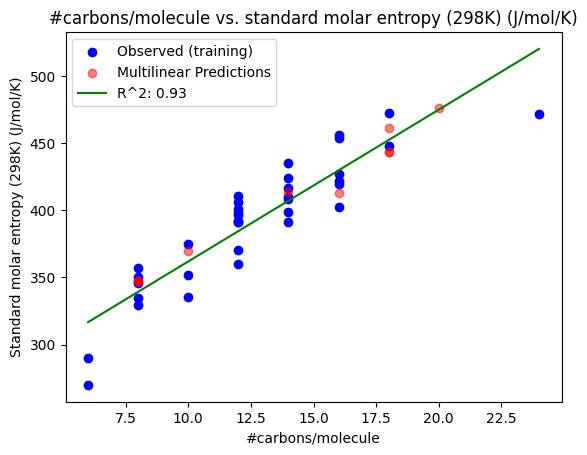

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


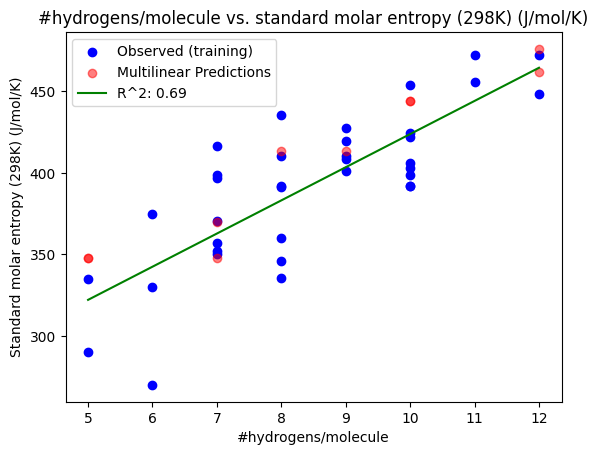

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


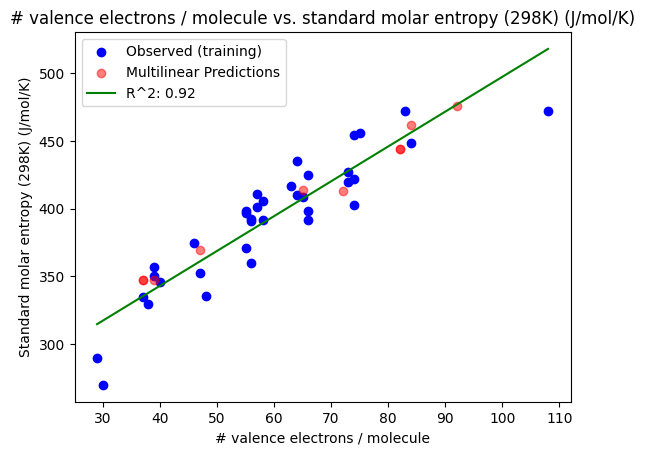

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


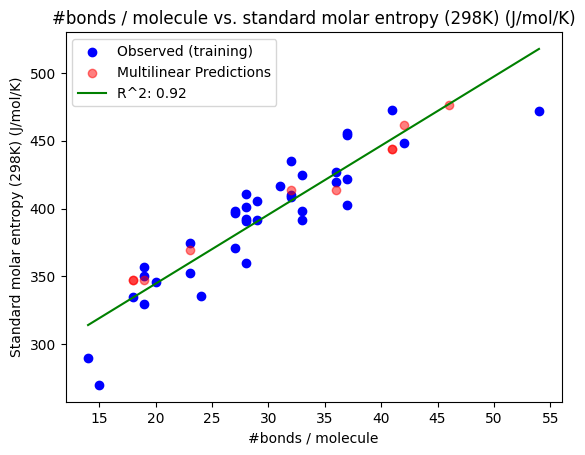

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


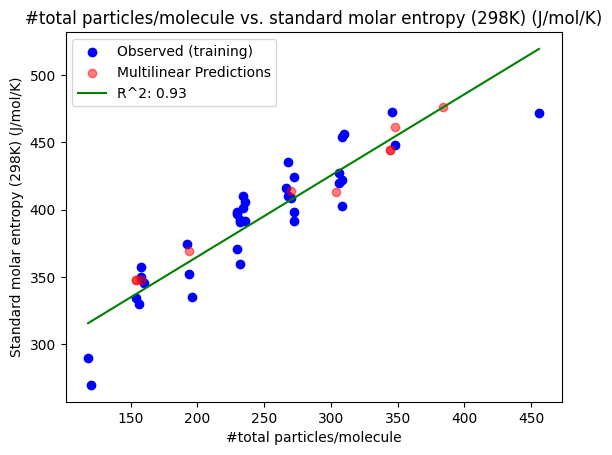

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


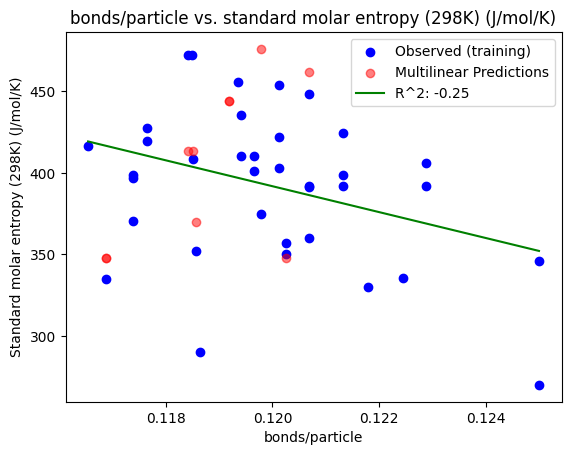

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


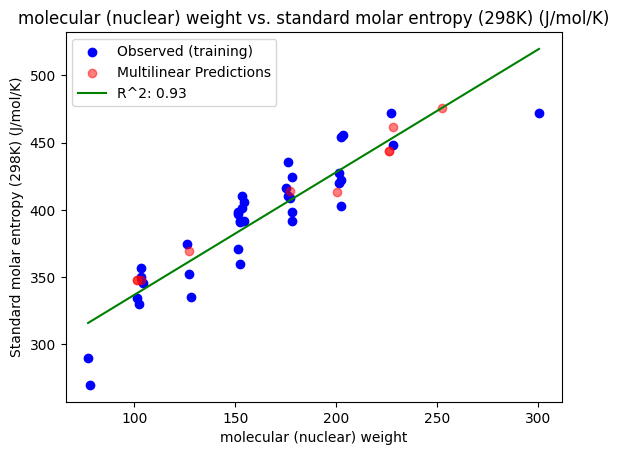

In [11]:
for column_name in X.columns:
    x_vals = np.linspace(X[column_name].min(), X[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel(column_name)
    plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
    plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

Intercept: 255.7939650466574
Coefficients:
  #carbons/molecule: 0.0
  #hydrogens/molecule: 0.0
  # valence electrons / molecule: 0.0
  #bonds / molecule: 0.0
  #total particles/molecule: 0.5567170211343394
  bonds/particle: -0.0
  molecular (nuclear) weight: 0.0
Mean Squared Error: 221.70566451838317
R^2 Score: 0.9214391635506651


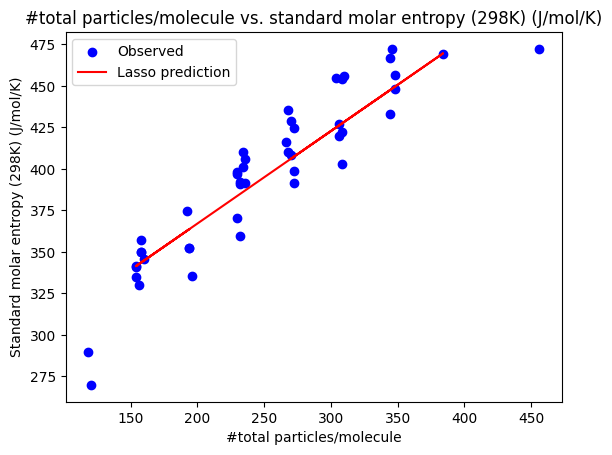

In [12]:
model_11_lasso_molar_entropy = LassoCV(cv=10)
model_11_lasso_molar_entropy.fit(X_train, y_train)

y_pred = model_11_lasso_molar_entropy.predict(X_test)

summarize(model_11_lasso_molar_entropy)

#plotting the lasso regression model for the standard molar entropy
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
#r2_score = model_2_lasso_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

Intercept: 237.43009494589643
Coefficients:
  #carbons/molecule: -0.19448041961286958
  #hydrogens/molecule: 2.1439739186976037
  # valence electrons / molecule: 1.36605224024702
  #bonds / molecule: -3.6521876787476533
  #total particles/molecule: 0.7873002843654628
  bonds/particle: -0.03049884570808079
  molecular (nuclear) weight: -0.17029618166974794
Mean Squared Error: 224.85472778162574
R^2 Score: 0.9203233010194591


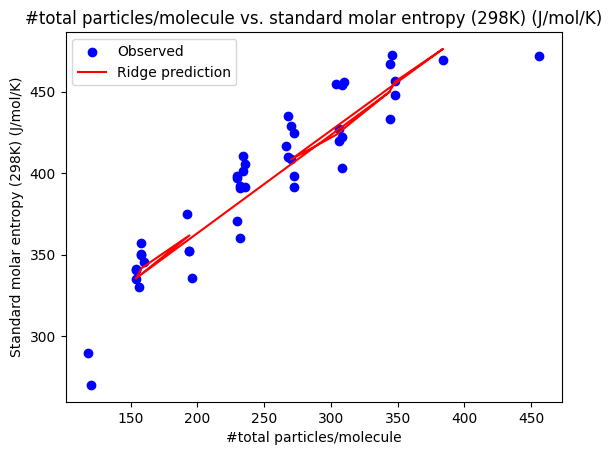

In [13]:
model_12_ridge_molar_entropy = RidgeCV(cv=10)
model_12_ridge_molar_entropy.fit(X_train, y_train)

y_pred = model_12_ridge_molar_entropy.predict(X_test)
summarize(model_12_ridge_molar_entropy)

#plotting the ridge regression model for the standard molar free entropy of formation
#this graph might not be super useful
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
#r2_score = model_3_ridge_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

The ridge predictions do not create straight lines with respect to the total particles / molecule because it does not automatically perform variable selection.

Fitting exponential multiple linear regression...
Model score:  0.8841895988037949


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


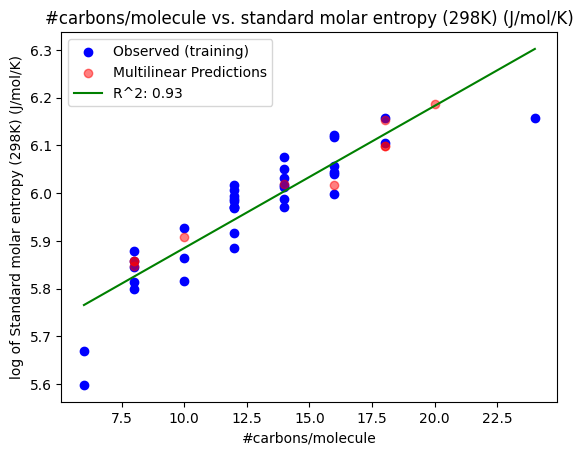

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


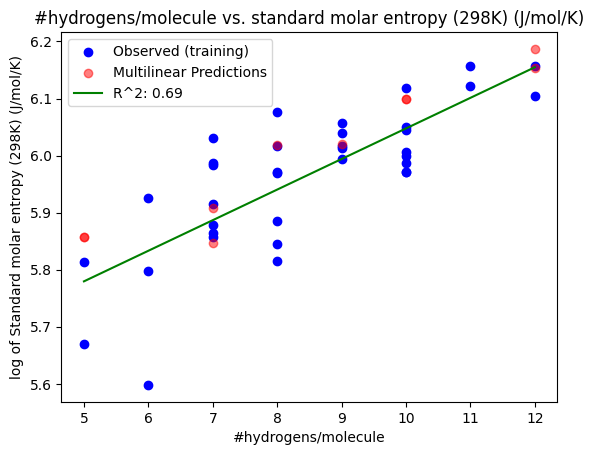

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


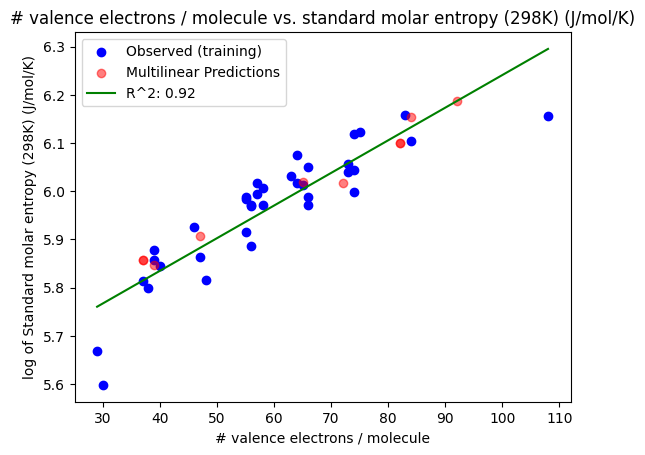

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


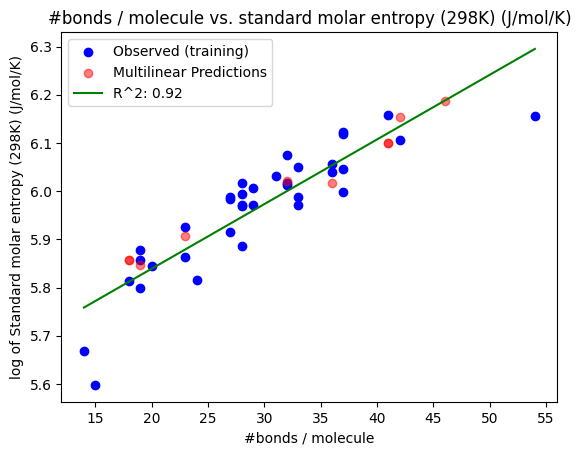

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


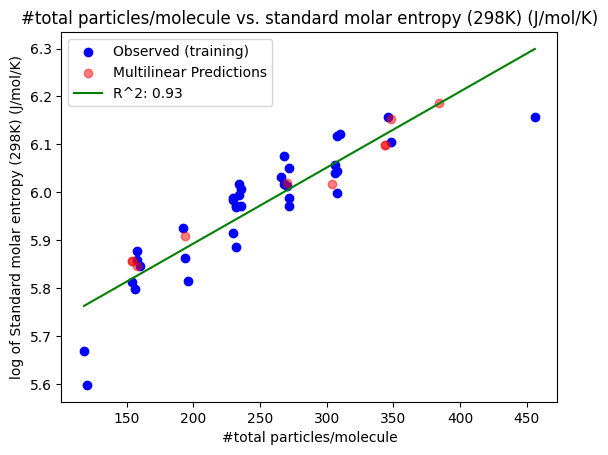

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


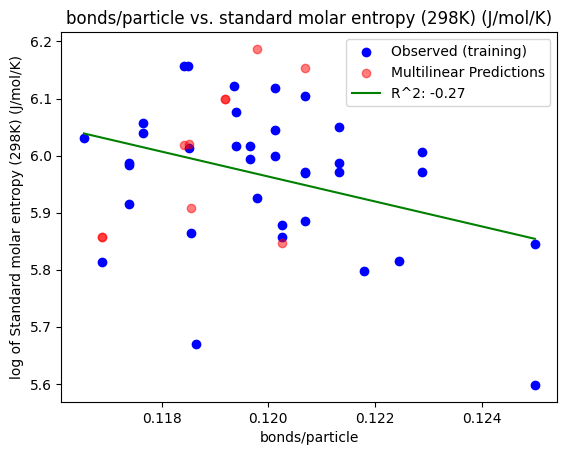

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


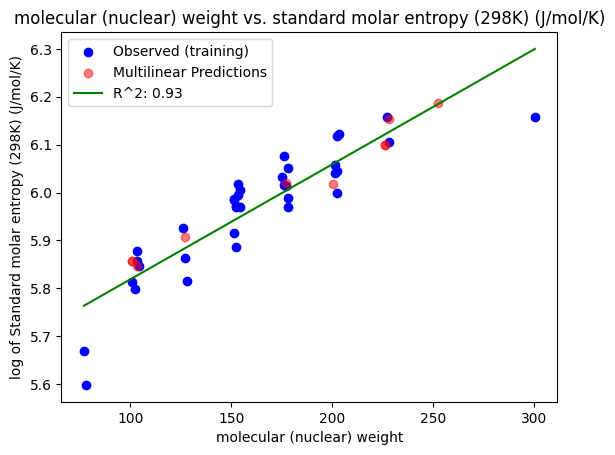

Intercept: 9.634204430138572
Coefficients:
  #carbons/molecule: -0.0024217581153803884
  #hydrogens/molecule: 0.019180124355255335
  # valence electrons / molecule: 0.009493091952374893
  #bonds / molecule: 0.08835213508335148
  #total particles/molecule: -0.005231397185746969
  bonds/particle: -34.282753432560575
  molecular (nuclear) weight: -0.009713389366092376
Mean Squared Error: 0.0020511103229377855
R^2 Score: 0.8841895988037949
Fitting exponential lasso regression...
Intercept: 5.609434179336444
Coefficients:
  #carbons/molecule: 0.0
  #hydrogens/molecule: 0.0
  # valence electrons / molecule: 0.0
  #bonds / molecule: 0.0
  #total particles/molecule: 0.001448874692653065
  bonds/particle: -0.0
  molecular (nuclear) weight: 0.0
Mean Squared Error: 0.001281216384293676
R^2 Score: 0.9276595793873821
Plotting exponential lasso regression...


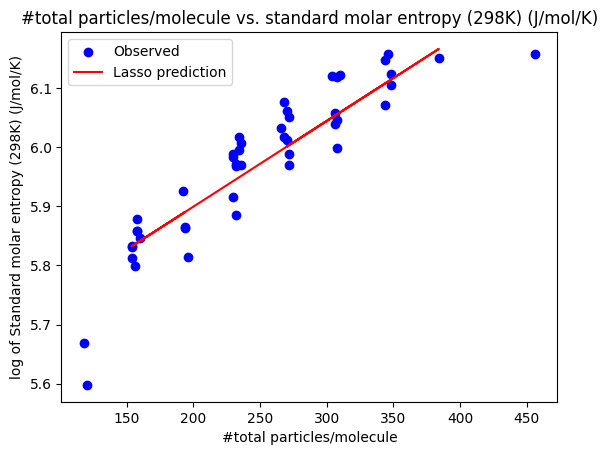

Computing exponential ridge regression...
Intercept: 5.556302460223614
Coefficients:
  #carbons/molecule: -0.0005234891771987822
  #hydrogens/molecule: 0.005761783760087972
  # valence electrons / molecule: 0.0036678270512950422
  #bonds / molecule: -0.009892889554784044
  #total particles/molecule: 0.002100762330598854
  bonds/particle: -9.397371800023189e-05
  molecular (nuclear) weight: -0.00046770342047820475
Mean Squared Error: 0.0014263932681192635
R^2 Score: 0.9194625589871459
Plotting exponential ridge regression...


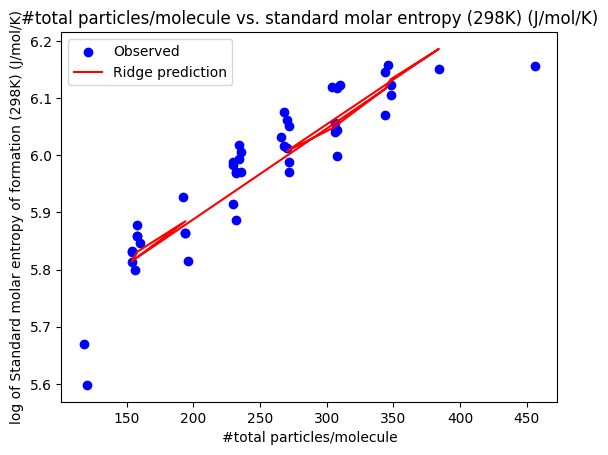

In [14]:
print('Fitting exponential multiple linear regression...')

y_transformed = np.log(y)

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

model_13_exponential_molar_entropy = LinearRegression()
model_13_exponential_molar_entropy.fit(X_train, y_train)

y_pred = model_13_exponential_molar_entropy.predict(X_test)

print('Model score: ', model_13_exponential_molar_entropy.score(X_test, y_test))

#this particular run is taking us through generating exponential models between standard molar free entropy of formation and a host of properties:
for column_name in X.columns:
    x_vals = np.linspace(X[column_name].min(), X[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel(column_name)
    plt.ylabel('log of Standard molar entropy (298K) (J/mol/K)')
    plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

summarize(model_13_exponential_molar_entropy)

print('Fitting exponential lasso regression...')

model_14_lasso_exponential_molar_entropy = LassoCV(cv=10)
model_14_lasso_exponential_molar_entropy.fit(X_train, y_train)

y_pred = model_14_lasso_exponential_molar_entropy.predict(X_test)

summarize(model_14_lasso_exponential_molar_entropy)

print('Plotting exponential lasso regression...')

#plotting the lasso regression model for the standard molar entropy
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y_transformed, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
#r2_score = model_2_lasso_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('log of Standard molar entropy (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

print('Computing exponential ridge regression...')

model_15_ridge_exponential_molar_entropy = RidgeCV(cv=10)
model_15_ridge_exponential_molar_entropy.fit(X_train, y_train)

y_pred = model_15_ridge_exponential_molar_entropy.predict(X_test)
summarize(model_15_ridge_exponential_molar_entropy)

print('Plotting exponential ridge regression...')
#plotting the ridge regression model for the standard molar entropy
column_name = '#total particles/molecule'
plt.scatter(X[column_name], y_transformed, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
#r2_score = model_3_ridge_molar_free_entropy.score(X_test, y_test)
plt.xlabel(column_name)
plt.ylabel('log of Standard molar entropy of formation (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

Fitting logarithmic multiple linear regression...
Model score:  0.8930122062552608
Intercept: -23230063.229814805
Coefficients:
  #carbons/molecule: 20597411.46862275
  #hydrogens/molecule: 18583.687903584912
  # valence electrons / molecule: -13904655.727378389
  #bonds / molecule: -23794533121.45905
  #total particles/molecule: 23940910030.3564
  bonds/particle: 23794532549.4843
  molecular (nuclear) weight: -153088076.13345444
Mean Squared Error: 301.9290651625181
R^2 Score: 0.8930122062552608


/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


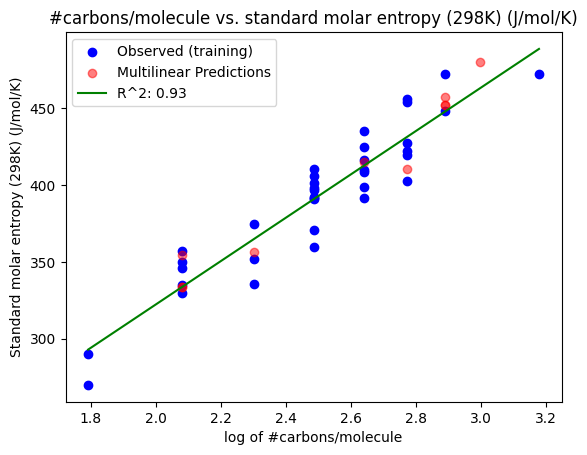

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


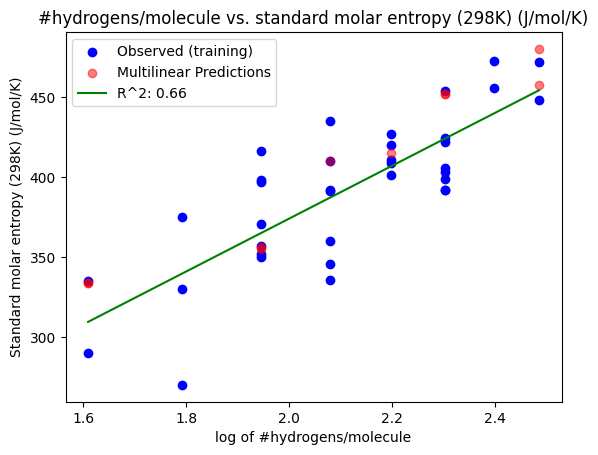

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


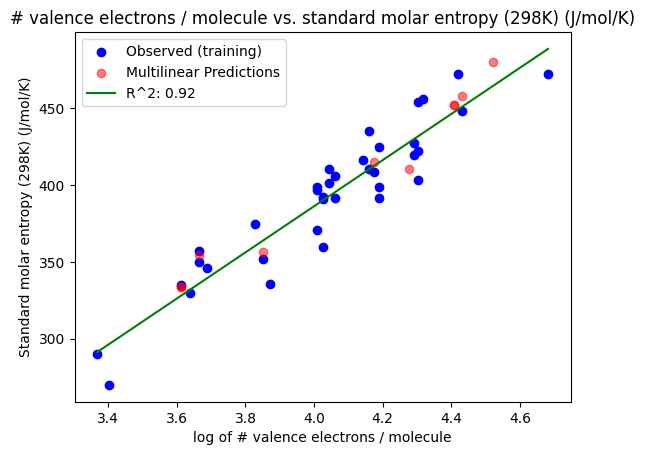

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


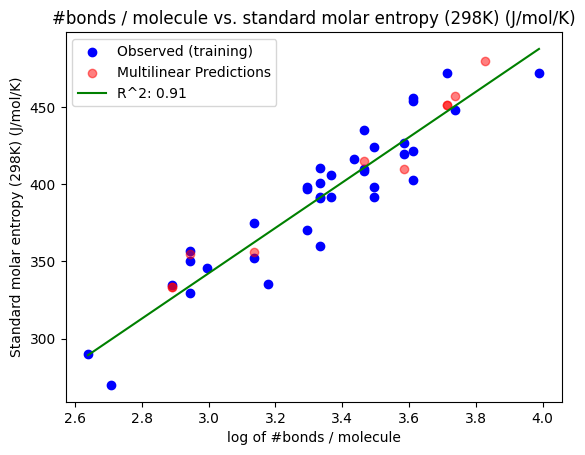

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


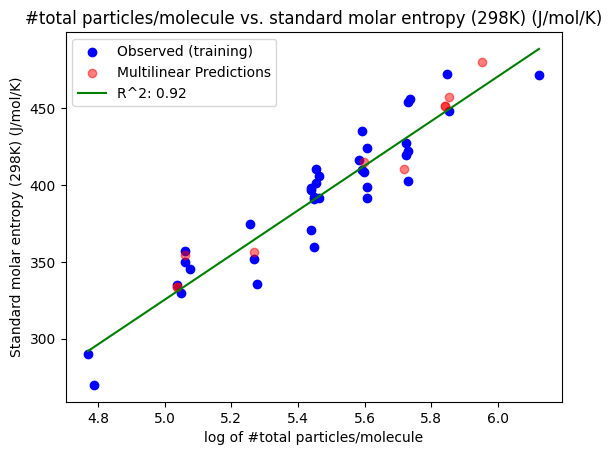

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


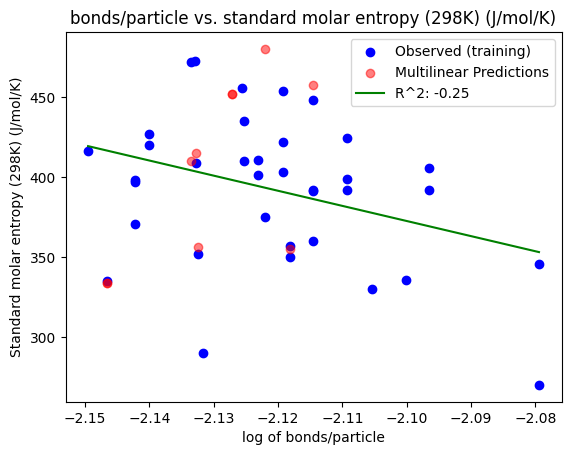

/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/user/Documents/Programming/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


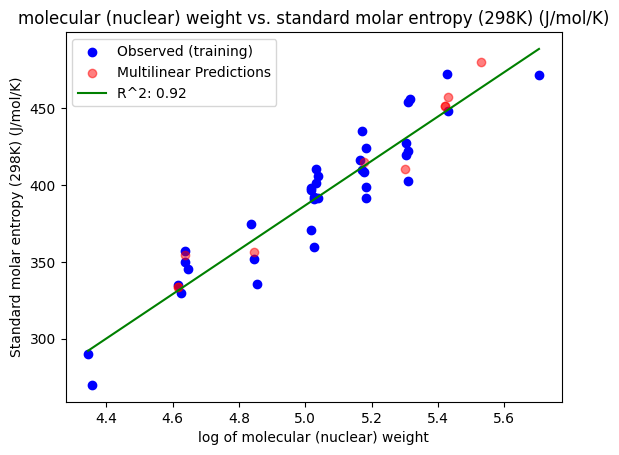

Fitting logarithmic lasso regression...
Intercept: -832.5283393726514
Coefficients:
  #carbons/molecule: 97.36144896666843
  #hydrogens/molecule: 55.20947644425097
  # valence electrons / molecule: 2.9677502751381217
  #bonds / molecule: -0.0
  #total particles/molecule: 0.0
  bonds/particle: -402.36451095287885
  molecular (nuclear) weight: 0.0
Mean Squared Error: 232.20317857791957
R^2 Score: 0.9177193962323725
Plotting logarithmic lasso regression...


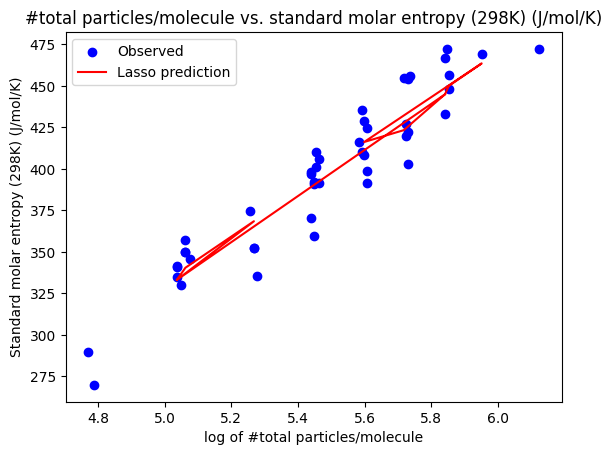

Computing logarithmic ridge regression...
Intercept: -167.95445955826165
Coefficients:
  #carbons/molecule: 27.66214449236206
  #hydrogens/molecule: 11.885275389436027
  # valence electrons / molecule: 25.21946958434182
  #bonds / molecule: 23.63616492705646
  #total particles/molecule: 26.471830318072538
  bonds/particle: -2.8356653672734033
  molecular (nuclear) weight: 26.74396462943355
Mean Squared Error: 249.76536598896783
R^2 Score: 0.9114962799403775
Plotting logarithmic ridge regression...


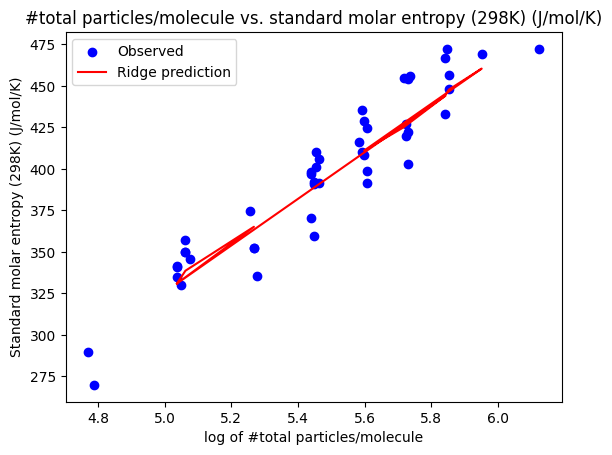

In [15]:
print('Fitting logarithmic multiple linear regression...')

X_transformed = np.log(X)

#train test data split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model_16_logarithmic_molar_entropy = LinearRegression()
model_16_logarithmic_molar_entropy.fit(X_train, y_train)

y_pred = model_16_logarithmic_molar_entropy.predict(X_test)

print('Model score: ', model_16_logarithmic_molar_entropy.score(X_test, y_test))

summarize(model_16_logarithmic_molar_entropy)

#this particular run is taking us through generating exponential models between standard molar entropy and a host of properties:
for column_name in X.columns:
    x_vals = np.linspace(X_transformed[column_name].min(), X_transformed[column_name].max(), 400).reshape(-1, 1)
    model_transient.fit(X_train[[column_name]], y_train)
    y_vals = model_transient.predict(x_vals)#pd.DataFrame({column_name: x_vals}))
    plt.scatter(X_train[column_name], y_train, color='blue', label='Observed (training)')
    plt.scatter(X_test[column_name], y_pred, color='red', label='Multilinear Predictions', alpha=0.5)
    r2 = model_transient.score(X_test[column_name].values.reshape(-1, 1), y_test)
    plt.plot(x_vals, y_vals, color='green', label=f'R^2: {r2:.2f}')
    plt.xlabel('log of ' + column_name)
    plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
    plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
    plt.legend()
    plt.show()

print('Fitting logarithmic lasso regression...')

model_17_lasso_logarithmic_molar_entropy = LassoCV(cv=10)
model_17_lasso_logarithmic_molar_entropy.fit(X_train, y_train)

y_pred = model_17_lasso_logarithmic_molar_entropy.predict(X_test)

summarize(model_17_lasso_logarithmic_molar_entropy)

print('Plotting logarithmic lasso regression...')

#plotting the lasso regression model for the standard molar entropy
column_name = '#total particles/molecule'
plt.scatter(X_transformed[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Lasso prediction')
plt.xlabel('log of ' + column_name)
plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

print('Computing logarithmic ridge regression...')

model_18_ridge_logarithmic_molar_entropy = RidgeCV(cv=10)
model_18_ridge_logarithmic_molar_entropy.fit(X_train, y_train)

y_pred = model_18_ridge_logarithmic_molar_entropy.predict(X_test)
summarize(model_18_ridge_logarithmic_molar_entropy)

print('Plotting logarithmic ridge regression...')
#plotting the ridge regression model for the standard molar entropy
column_name = '#total particles/molecule'
plt.scatter(X_transformed[column_name], y, color='blue', label='Observed')
plt.plot(X_test[column_name], y_pred, color='red', label='Ridge prediction')
plt.xlabel('log of ' + column_name)
plt.ylabel('Standard molar entropy (298K) (J/mol/K)')
plt.title(column_name + ' vs. standard molar entropy (298K) (J/mol/K)')
plt.legend()
plt.show()

For the standard molar entropy of the polycyclic aromatic hydrocarbons, there are a number of very high correlations, such as log of molecular weight against standard molar entropy $R^2 = 0.92$, log of #carbons / molecule against standard molar entropy $R^2 = 0.93$, molecular weight against log of standard molar entropy $R^2 = 0.93$, and #total particles / molecule against standard molar entropy $R^2 = 0.93$. The strongest regression model which makes use of multiple predictors in training is $R^2 = 0.927$ on the lasso regression for exponential relationships, which selected #total particles / molecule as the sole predictor for the standard molar entropy as a response. The lasso regression models for standard molar free entropy of formation as a response also select #total particles / molecule to be exclusively the most relevant predictor. It appears that the ratio of subatomic particles per molecule is the best predictor for the entropic properties of polycyclic aromatic hydrocarbons.

As the rate of subatomic particles per molecule in a polycyclic aromatic hydrocarbon increases, the standard molar entropy tends to increase and the standard molar free entropy of formation tends to decrease.

This trend might challenge the conventional notion that entropy is a measure of disorder, because we find increasing standard molar entropies for the increasing size of organic molecules which are highly ordered (PAHs).

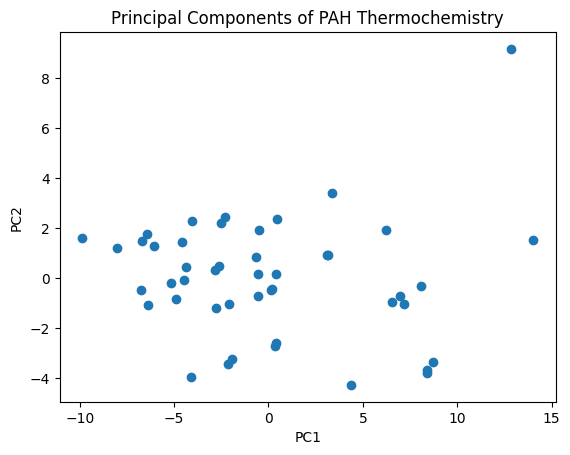

Variance explained by each component: [0.76225045 0.13782869 0.05802059 0.02003238 0.01141601]
Loadings in the first principle component:

#carbons/molecule: -0.17216072726105894
#hydrogens/molecule: -0.15666430631730832
# valence electrons / molecule: -0.1728732839384492
#bonds / molecule: -0.17266950566245895
#total particles/molecule: -0.1725668603749473
bonds/particle: 0.02652450136073265
molecular (nuclear) weight: -0.1724829024987645
entropy S (298K) (J/mol/K): -0.17016120373361862
entropy S (298K) (J/g/K): 0.17366905525363488
formation entropy Sf (298K) (J/mol/K): -0.17016120373361868
formation entropy Sf (298K) (J/g/K): -0.1684511840657803
formation enthalpy (298K) (kJ/mol): -0.17093074829576305
formation enthalpy (298K) (kJ/g): 0.13930011625986796
formation Gibbs (298K) (kJ/mol) (dG = dH – TdS): 0.16610196485434392
formation Gibbs (298K) (kJ/g) (dG = dH – TdS): 0.17262016247682443
formation free entropy (298K) (J/mol/K): 0.16610196485383438
formation free entropy (298K) (J/g/K

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
scaled_thermochemistry = scaler.fit_transform(this_thermochemistry)

# Apply PCA
pca = PCA(n_components=5)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_thermochemistry)

# Create a DataFrame with the principal components
pca_thermochemistry = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])  # Adjust column names based on n_components

plt.scatter(pca_thermochemistry['PC1'], pca_thermochemistry['PC2'])
plt.title('Principal Components of PAH Thermochemistry')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

variance_explained = pca.explained_variance_ratio_
print('Variance explained by each component:', variance_explained)

feature_names = list(this_thermochemistry.columns)
pc1_loadings = pca.components_[0]

# Print loadings
print('Loadings in the first principle component:\n')
for feature, loading in zip(feature_names, pc1_loadings):
    print(f"{feature}: {loading}")


The variance as explained by the first two principal components in PCA of the PAH thermochemistry dataframe does not add all the way to one. That means that, for the first several components (of which we have computed the first five), there is at least some non-noise signal. This indicates that the variance of the thermodynamic and molecular properties of PAHs is mostly dominated by one component (the relationship between entropy and subatomic particle counts), but cannot be simply reduced to one determining factor. The loadings in the first principle component shows that the signal in the data set is very much a combination of all the features, except with low loading coming from the standard molar entropy over nuclear weight and standard molar enthalpy of formation over nuclear weight (both of these variables have <0.1 loading in the first principal component).